# Práctica 1. Preparación de un dataset para un proyecto de ML.

En esta práctica se va a preparar un dataset para su posterior uso en una aplicación de Machine Learning (ML). El dataset escogido puede descargarse de forma gratuita en: https://www.kaggle.com/datasets/vijayaadithyanvg/breast-cancer-prediction. 

Lo primero es importar el dataset y algunas librerias que suelen utilizarse para el análisis de datos como pandas.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv("data.csv") # Leemos el dataset y lo almacenamos en la variable dataset

dataset

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Cuestión 1: 
**Describa brevemente el dataset elegido, indicando el objetivo, número de observaciones y número de características disponibles.**


El dataset escogido contiene varias características obtenidas a partir de imágenes de mama. Estas características pueden ser relevantes para la correcta distinción entre masas tumorales benignas o malignas. En concreto este dataset cuenta con 569 observaciones (número de filas) y 32 características (número de columnas). De las 32 características, una de ellas es el ID del paciente, otra el diagnóstico y el resto son características numéricas. 

## Cuestión 2:

**Describa las características del dataset, el tipo (categóricas o continuas) y si están completas. En caso de no estar completas proponga, de forma razonada en cada caso, un método para solventar este problema.**

El dataset cuenta con 32 categorias, dos de ellas son categóricas, el ID del paciente que es un número único asignado a cada paciente y el diagnóstico, que es un string que acepta valores de M si el tumor es maligno y B si es benigno. 

EL resto de características son continuas, y realmente hacen referencia a 10 características independientes que son:

* Radio de la masa
* Textura de la masa
* Perimetro de la masa
* Area de la masa
* Suavidad de la masa
* Compacticidad de la masa
* Concatividad de la masa
* Puntos cóncavos
* Simetría
* Dimensión fractal

Sin embargo, de cada una de estas características se da el valor medio, el peor y el mayor.

Con la función de pandas info() se puede ver la información del dataset. En concreto se ven todas las categorías, cuantos valores non-null hay y el tipo de los datos que contiene dicha categoría. En concreto este dataset es completo, ninguna categoría tiene valores vacíos.


In [39]:
dataset.info() # Vemos el número de datos que contiene cada categoría y el tipo de cada categoría.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Otra forma de poder ver si hay valores vacíos es a partir de la función isnull()

In [40]:
print("Categoria  Valores Vacíos \n{}".format(dataset.isnull().sum()))

Categoria  Valores Vacíos 
id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Cuestión 3:

**Características continuas. Analice en cada caso la distribución de las características y los posibles valores atípicos (outliers). Proponga un método de normalización si corresponde.**

En este caso, excepto las dos primeras características, el resto son continuas por lo que haremos el análisis de todas ellas.

In [41]:
continuous_categories = []
for column in dataset.columns:
    if dataset[column].dtype == 'float64':
        continuous_categories.append(column)
        
print("Características Continuas: \n{}".format(dataset[continuous_categories].columns))
print("Número de categorías continuas: {}".format(len(continuous_categories)))

Características Continuas: 
Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Número de categorías continuas: 30


Para poder ver la distribución de las características, hacemos un histograma para cada una de las características continuas.

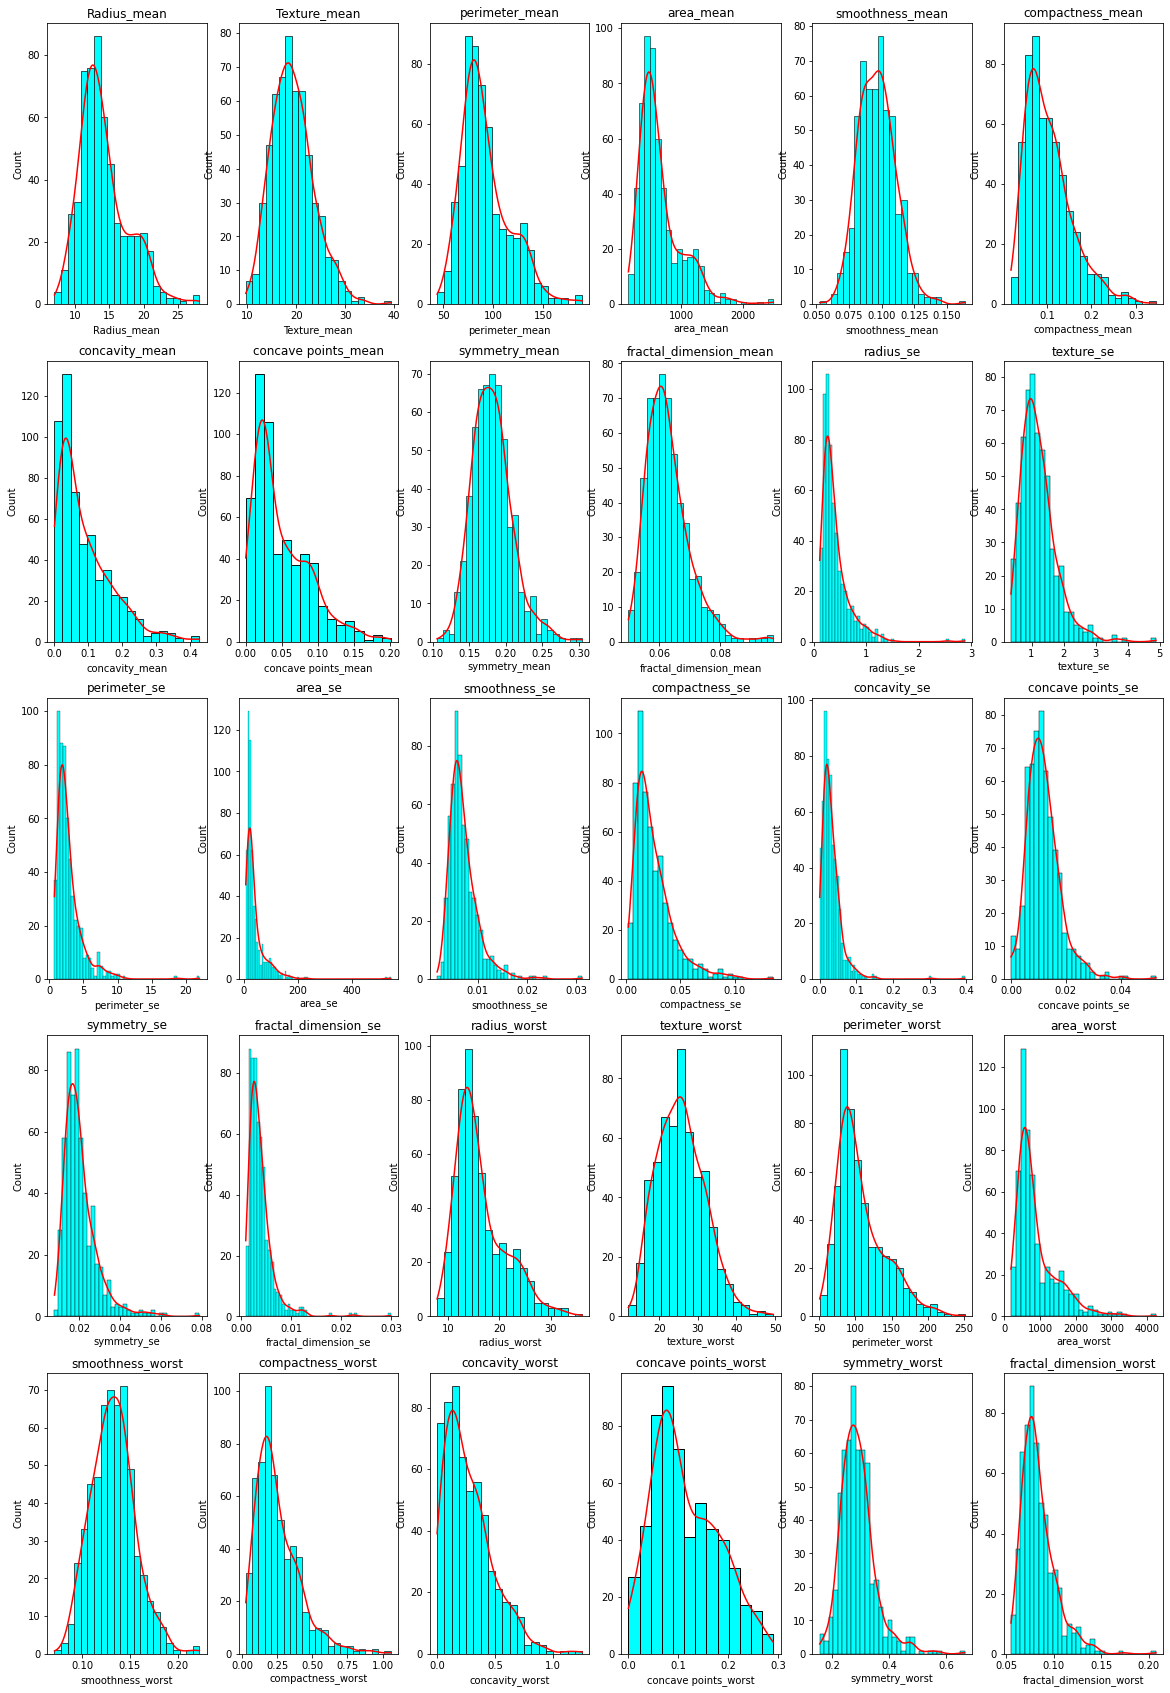

In [42]:
import seaborn as sns
fig, axes = plt.subplots(int(np.ceil((np.sqrt(len(continuous_categories)))))-1, int(np.ceil((np.sqrt(len(continuous_categories))))), figsize = (20,30))
i = 0
j = 0
for column in continuous_categories:
    sns.histplot(data=dataset, x= dataset[column], kde=True, facecolor = 'cyan', color='red', ax=axes[i, j]).set(title=str(column))    
    if j == int(np.ceil((np.sqrt(len(continuous_categories)))))-1:
        i += 1
        j = 0
    else:
        j += 1
plt.show()

Se observa como hay ciertas características que presentan outliers (symmetry_worst, fractal_dimension_se, etc) y algunas de ellas con un rango muy amplio. Una normalización Z-score puede ser una correcta normalización para los datos, de esta manera nos aseguramos que los rangos de todas las características continuas sean similares.

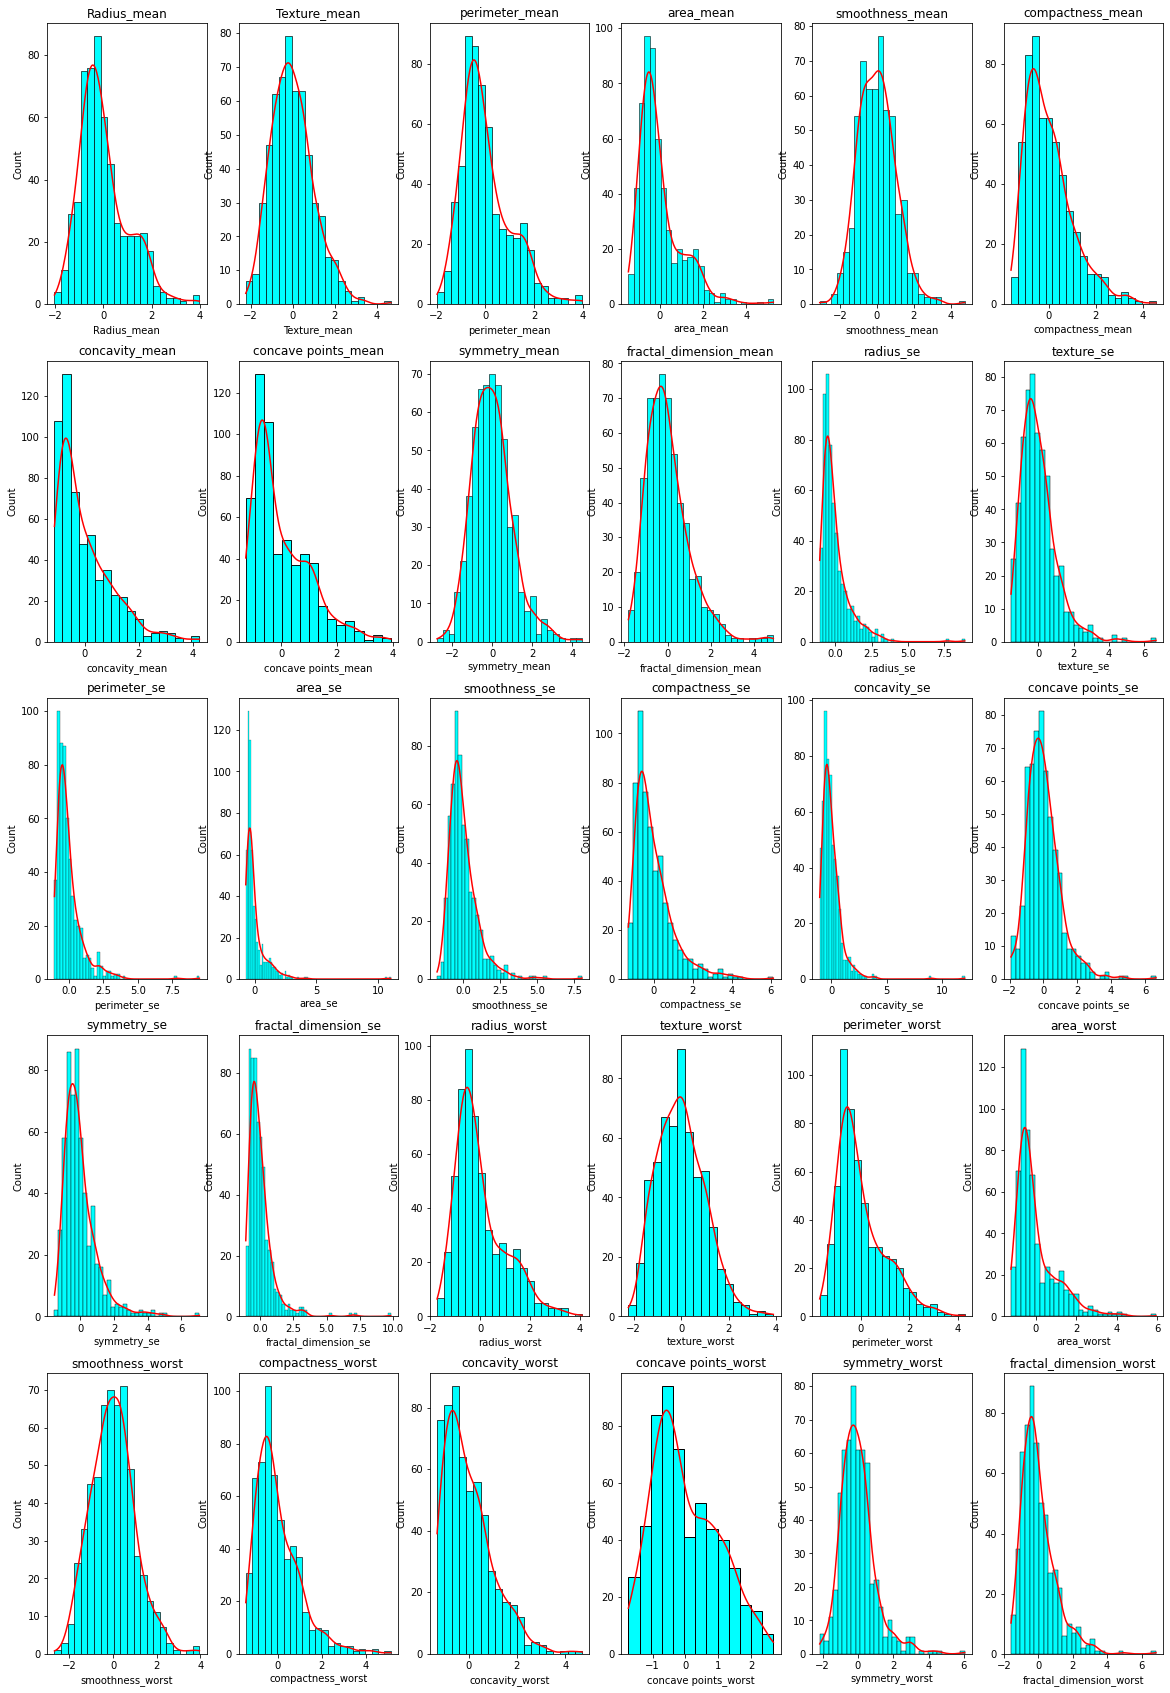

In [43]:
aux_dataset = dataset.copy() # Hacemos una copia del dataset
fig, axes = plt.subplots(int(np.ceil((np.sqrt(len(continuous_categories)))))-1, int(np.ceil((np.sqrt(len(continuous_categories))))), figsize = (20,30))
i = 0
j = 0
for column in continuous_categories:
    mean = aux_dataset[column].mean()
    std = aux_dataset[column].std()
    z = (aux_dataset[column] - mean)/std
    aux_dataset[column] = z
    sns.histplot(data=aux_dataset, x= aux_dataset[column], kde=True, facecolor = 'cyan', color='red', ax=axes[i, j]).set(title=str(column))
    
    if j == int(np.ceil((np.sqrt(len(continuous_categories)))))-1:
        i += 1
        j = 0
    else:
        j += 1
plt.show()
    
    

Para solucionar el problema de posibles outliers en los datos, primero debemos poder detectarlos. Se suele decir que los datos que están a una distancia de 3\sigma de la media, con \sigma igual a la desviación estándar, son outliers. Una vez normalizados los datos con la distribución Z-score es muy sencillo detectar outliers ya que la media es igual a 0 y la desviación estándar es 1, por lo que datos que estén fuera del rango [-3, 3] se consideran outliers. Podemos ver que varias categorias tienen outliers, en este caso se ha decidido que estos outliers tomen valores iguales a 3 o -3, dependiendo de donde se situen.

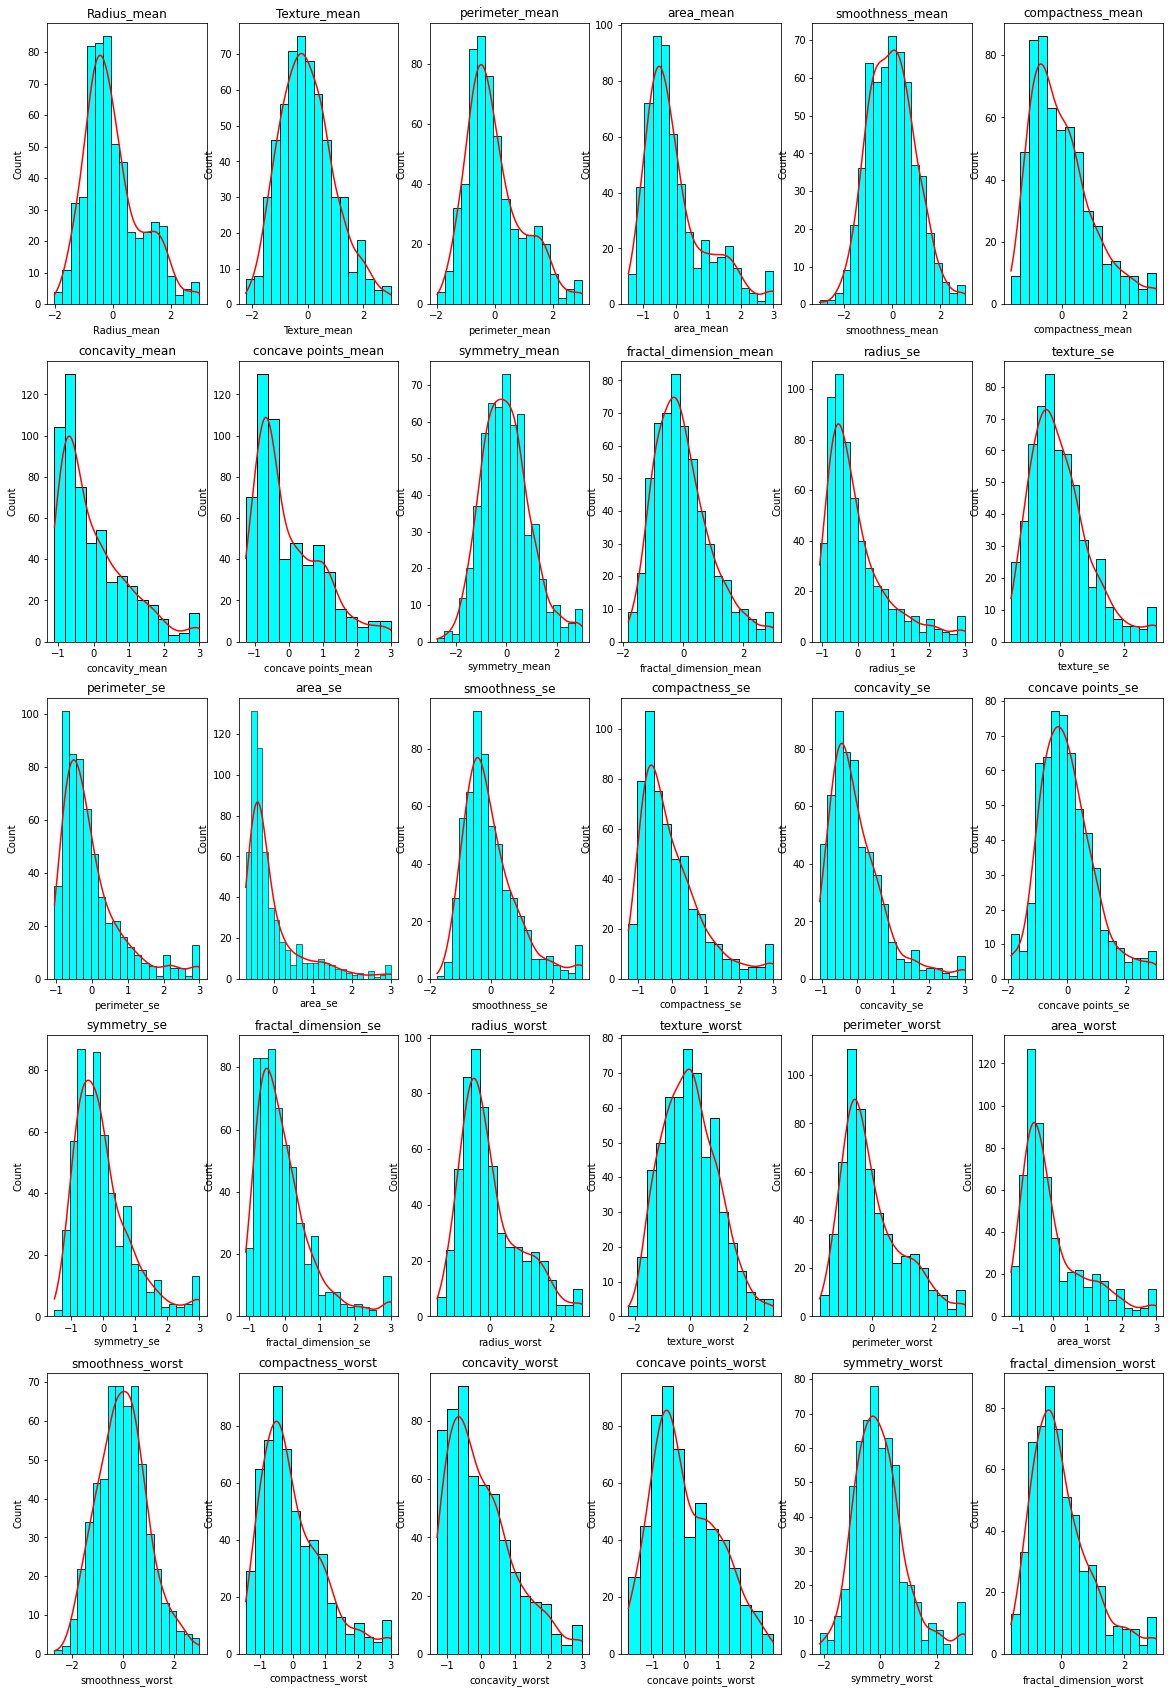

In [44]:
no_outliers_dataset = aux_dataset.copy() #Hacemos una copia del dataset anterior

fig, axes = plt.subplots(int(np.ceil((np.sqrt(len(continuous_categories)))))-1, int(np.ceil((np.sqrt(len(continuous_categories))))), figsize = (20,30))
i = 0
j = 0
for column in continuous_categories:
    # Valores más allá de 3*sigma los modificamos, otra opción es eliminarlos.
    no_outliers_dataset.loc[(no_outliers_dataset[column] > 3), column] = 3 
    no_outliers_dataset.loc[(no_outliers_dataset[column] < -3), column] = -3 

    sns.histplot(data=no_outliers_dataset, x= no_outliers_dataset[column], kde=True, facecolor = 'cyan', color='red', ax=axes[i, j]).set(title=str(column))    
    
    if j == int(np.ceil((np.sqrt(len(continuous_categories)))))-1:
        i += 1
        j = 0
    else:
        j += 1
plt.show()

## Cuestión 4.

**Características categóricas. Analice en cada caso la distribución de las clases. Proponga un cambio en la presentación si corresponde.**

En este caso solo hay dos características categóricas. Una de ellas es el ID del paciente o de la prueba diagnóstica, la cual no es relevante en el análisis. La segunda característica categórica sí es importante ya que nos indica si el tumor es benigno (B) o maligno (M). En este caso lo más sencillo es asignarle al valor B el valor numérico 0 y al valor M el valor numérico 1.

Asignamos esta modificación a otra copia del dataset, para no modificar los anteriores datasest.

In [45]:
c4_dataset = no_outliers_dataset.copy()
c4_dataset.replace(['B', 'M'],[0, 1], inplace=True)
c4_dataset

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.096100,-2.072771,1.268817,0.983510,1.567087,3.000000,2.650542,2.530249,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,842517,1,1.828212,0.574948,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,84300903,1,1.578499,0.454069,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,84348301,1,-0.768233,0.251829,-0.592166,-0.763792,3.000000,3.000000,1.914213,1.450431,...,-0.281217,0.133866,-0.249720,-0.549538,3.000000,3.000000,1.987839,2.173873,3.000000,3.000000
4,84358402,1,1.748758,-1.152229,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.109139,0.719073,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,926682,1,1.703356,2.081289,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,926954,1,0.701667,2.041770,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,927241,1,1.836725,2.332345,1.980781,1.733693,1.524426,3.000000,3.000000,2.656528,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.000000,3.000000,2.287972,1.917396,2.217684


## Cuestión 5
**En el caso de ser un modelo de clasificación, analizar si se trata de un modelo balanceado en la distribución de clases. En caso de estar desbalanceado proponga un método para solventar este problema.**

Para ver si es un modelo balanceado, hacemos un histograma para ver si hay alguna clase menos representada que otra. En este caso el análisis solo hay que hacerlo con la característica categórica diagnosis.

Se tiene un total de 357 casos con tumores benignos (62.7 %) y 212 casos con tumores malignos (37.3 %)


C:\Users\vslga\AppData\Local\Temp/ipykernel_11752/3111734000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c4_dataset['diagnosis'], palette=('blue', 'red'))


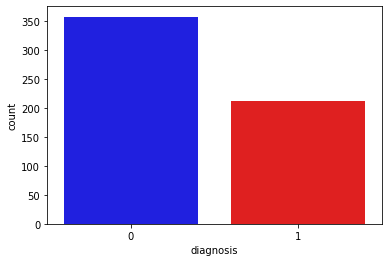

In [46]:
sns.countplot(x=c4_dataset['diagnosis'], palette=('blue', 'red'))

count_diagnosis = c4_dataset['diagnosis'].value_counts()
ratio = 100 * count_diagnosis / len(c4_dataset['diagnosis'])
print(f'Se tiene un total de {count_diagnosis[0]} casos con tumores benignos ({ratio[0]:.1f} %) y {count_diagnosis[1]} casos con tumores malignos ({ratio[1]:.1f} %)')

Podemos ver como la cantidad de datos en el que el diagnóstico es de tumor benigno (0) es superior al diagnóstico de tumor maligno (1). La diferencia, sin embargo, no es muy grande.

## Cuestión 6

**Selección de características. Analice el número de características disponibles y si resulta un número adecuado para el entrenamiento del modelo propuesto. Justifique en cualquier caso la selección y/o el descarte de características.**

Una de las características que se pueden eliminar es el ID. Vamos a eliminarla de nuestro dataset y analizar el resto de características para ver como de correlacionadas están.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

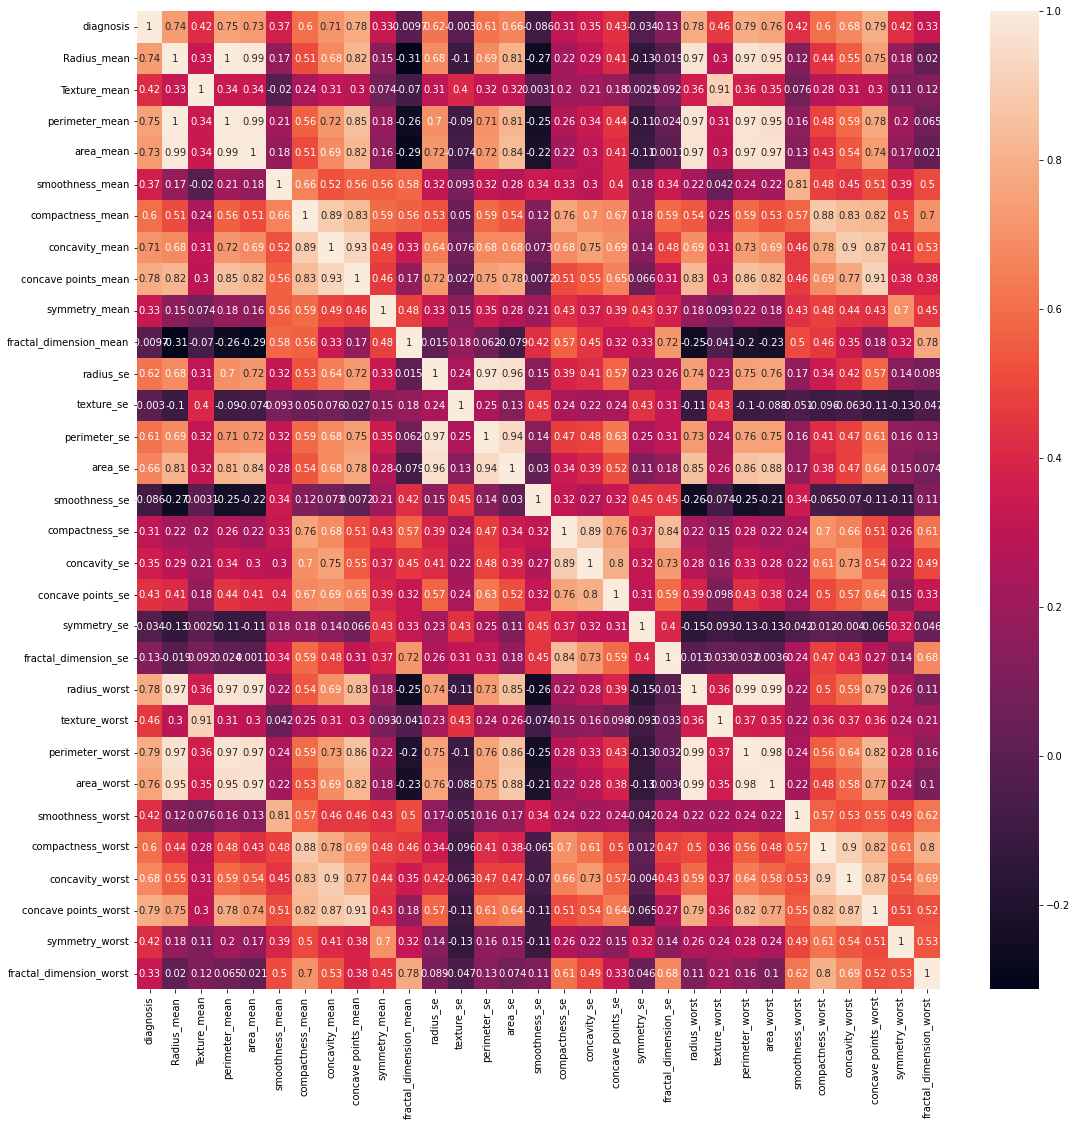

In [47]:
dataset_no_id = c4_dataset.copy()
dataset_no_id = dataset_no_id.drop(columns ='id')

plt.figure(figsize = (18,18))
correlation = dataset_no_id.corr()
sns.heatmap(correlation, annot = True)
dataset_no_id.info()

Viendo la correlación entre características, podríamos descartar algunas de ellas, las que estén altamente correlacionadas. En este caso las características que presentan una mayor correlación son el radio con el perimetro y con el área como es normal. Podríamos quedarnos con una de estas características, por ejemplo el área. Esto habría que hacerlo tanto con el area_mean, area_se y area_worst. De la misma manera, podemos ver como la correlación entre la concavidad y la compacticidad también es muy alta, podemos eliminar una de las dos. Por el mismo motivo, se pueden eliminar las categorías concave points_mean y Texture_mean.

<AxesSubplot:>

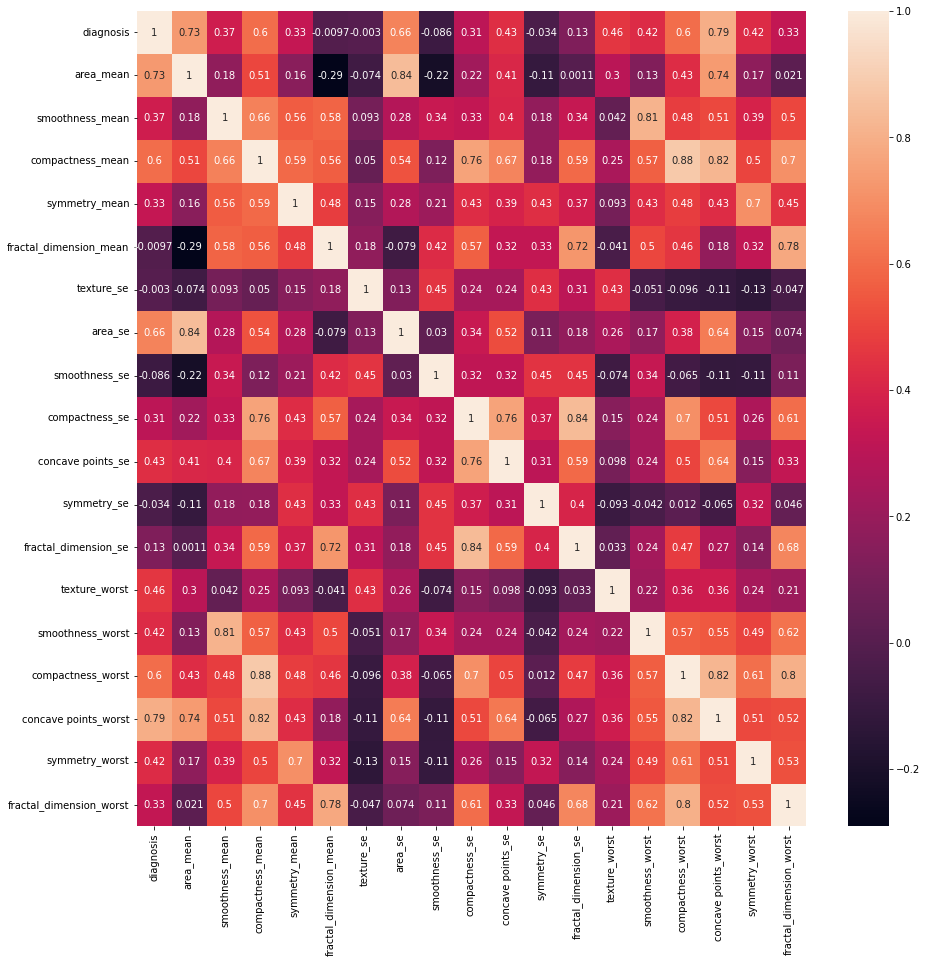

In [48]:
final_dataset = dataset_no_id.copy()

final_dataset = final_dataset.drop(columns =['Radius_mean', 'perimeter_mean', 'concavity_mean', 'radius_se', 'perimeter_se','concavity_se', 'radius_worst', 'perimeter_worst','area_worst','concavity_worst', 'concave points_mean', 'Texture_mean'])
plt.figure(figsize = (15,15))
correlation = final_dataset.corr()
sns.heatmap(correlation, annot = True)


Podríamos eliminar más características. Por ejemplo, las categorías fractal_dimension_mean, texture_se, smoothness_se, symmetry_se y fractal_dimension_se tienen una correlación muy baja con el diagnóstico por lo que pueden ser eliminados.

<AxesSubplot:>

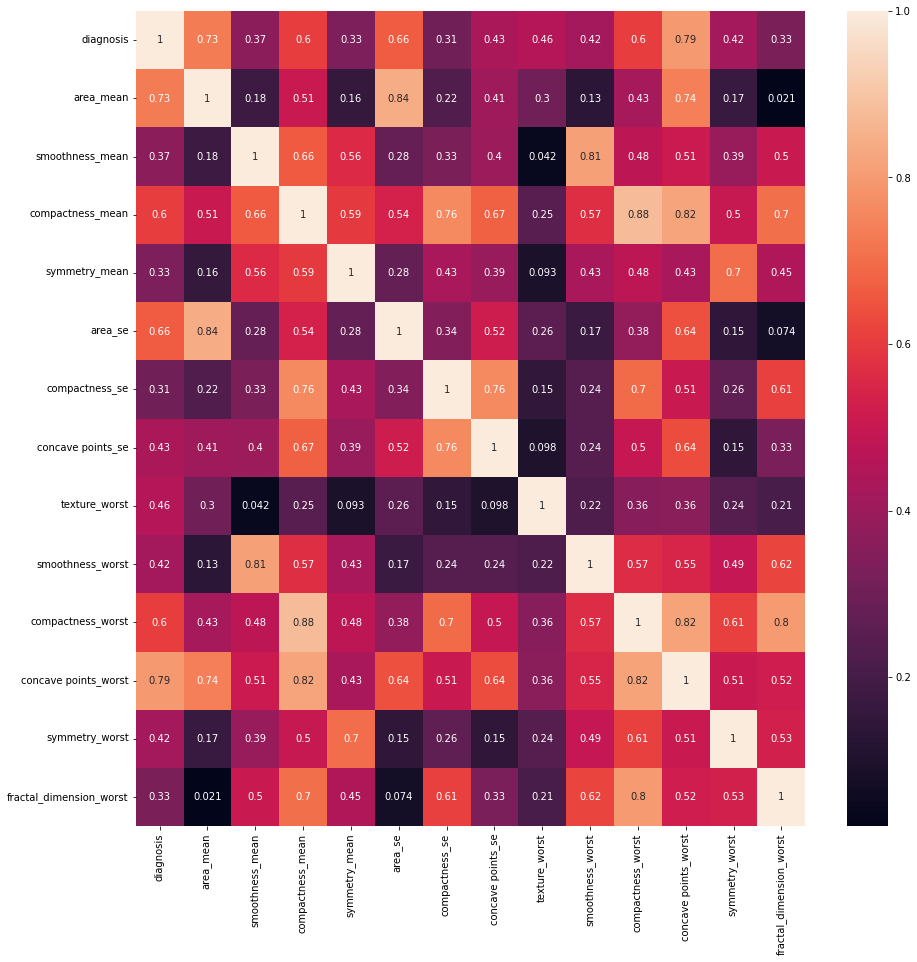

In [49]:
final_dataset = final_dataset.drop(columns =['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'])
plt.figure(figsize = (15,15))
correlation = final_dataset.corr()
sns.heatmap(correlation, annot = True)

Nos vamos a quedar con estas características no categoricas para entrenar el modelo. 


## Extra

Aunque la práctica no lo incluye, vamos a tratar de entrenar el modelo y ver la precisión de este. 

El objetivo es clasificar entre tumor benigno y maligno.

Primero hay que generar los datos de entrenamiento, para ello vamos a utilizar funciones de sklearn.

In [58]:
from sklearn.model_selection import train_test_split

# Seleccionamos los valores a predecir
y = final_dataset['diagnosis']

# Seleccionamos las características
x = final_dataset.drop(columns = 'diagnosis')

# La función train_test_split nos devuelve un conjunto de x e y para entrenar y otro conjunto de x e y para hacer el test.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Hay varios algoritmos que se pueden utilizar, por ejemplo podemos utilizar un clasificador K-Neighbors. Tambien vamos a ver la matriz de confusión que nos dará una idea de lo preciso que es nuestro modelo.

Precisión: 0.9440559440559441
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        78
           1       0.98      0.89      0.94        65

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



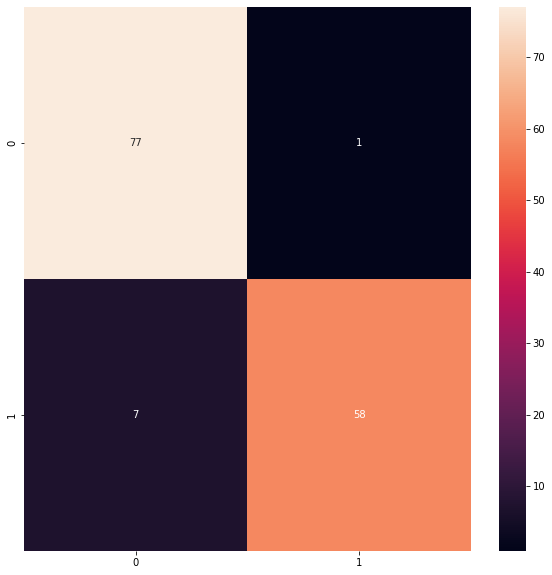

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializamos el clasificador
clasificador = KNeighborsClassifier(3)

# Entrenamiento
clasificador.fit(x_train, y_train)

# predicción del modelo
prediciones = clasificador.predict(x_test)

# Evaluación 
accuracy = clasificador.score(x_test, y_test)
report = classification_report(y_test, prediciones)
conf_matrix = confusion_matrix(y_test, prediciones)
print(f'Precisión: {accuracy}')
print(report)

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True)
plt.show()

## Random Forest

Podemos probar también la eficiencia de un algoritmo Random Forest para la clasificación entre tumores benignos o malignos con este dataset.

Precisión: 0.9440559440559441
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        78
           1       1.00      0.88      0.93        65

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



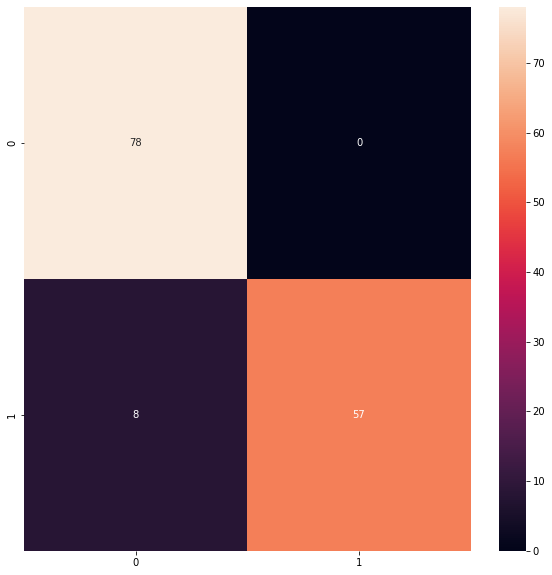

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializamos el clasificador
number_of_trees = 50

clasificador = RandomForestClassifier(n_estimators=number_of_trees)

# Entrenamiento
clasificador.fit(x_train, y_train)

# predicción del modelo
prediciones = clasificador.predict(x_test)

# Evaluación 
accuracy = clasificador.score(x_test, y_test)
report = classification_report(y_test, prediciones)
conf_matrix = confusion_matrix(y_test, prediciones)
print(f'Precisión: {accuracy}')
print(report)

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True)
plt.show()